In [1]:
%ls

 Volume in drive C is WinOS
 Volume Serial Number is D643-BD11

 Directory of C:\Users\user\OneDrive\BDAT1008\week2

2022-05-19  04:25 PM    <DIR>          .
2022-05-19  04:25 PM    <DIR>          ..
2022-05-18  05:45 PM    <DIR>          .ipynb_checkpoints
2022-05-17  09:13 PM               718 derby.log
2022-05-17  07:59 PM            62,542 lec01_pyspark_csv_local.ipynb
2022-05-17  10:39 PM            34,699 lec01_pyspark_sql_windows.ipynb
2022-05-17  09:21 PM           703,722 lec01_pyspark_sql_windows_stages.pdf
2022-05-19  01:07 PM            22,227 lec01_pyspark_txt.ipynb
2022-05-19  03:56 PM           258,358 lec02_OrdersData_BatchAnalytics_databricks.ipynb
2022-05-19  04:24 PM            25,965 lec02_OrdersData_StreamingAnalytics_databrick.ipynb
2022-05-17  09:13 PM    <DIR>          metastore_db
2022-05-15  10:54 PM               723 part-00000-0231aeb9-684e-4c0c-af85-da4ecf779a08-c000.snappy.parquet
2022-05-15  11:19 PM             1,050 part-00000-21705c6e-4696-4621-b88a-53

In [2]:
%ls sample_data

 Volume in drive C is WinOS
 Volume Serial Number is D643-BD11

 Directory of C:\Users\user\OneDrive\BDAT1008\week2\sample_data

2022-05-19  04:00 PM    <DIR>          .
2022-05-19  04:00 PM    <DIR>          ..
2022-05-02  10:40 PM           301,141 california_housing_test.csv
2022-05-02  10:40 PM         1,706,430 california_housing_train.csv
2022-05-02  10:40 PM        18,289,443 mnist_test.csv
2022-04-22  11:25 PM           500,979 orders_data.zip
               4 File(s)     20,797,993 bytes
               2 Dir(s)  19,836,817,408 bytes free


In [3]:
# import findspark
# findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [6]:
# File location and type
path = 'sample_data/california_housing_train.csv'
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# Import csv. The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(path)

df.head() #first row object

Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0)

In [7]:
type(df.head())

pyspark.sql.types.Row

In [8]:
df.take(5) #first 5 row objects

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0),
 Row(longitude=-114.57, latitude=33.64, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.1917, median_house_value=73400.0),
 Row(longitude=-114.57, latitude=33.57, housing_median_age=20.0, total_rooms=1454.0, total_bedrooms=326.0, population=624.0, households=262.0, median_income=1.925, median_house_value=65500.0)]

In [9]:
type(df.take(5))

list

In [10]:
df.limit(5).collect()

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0),
 Row(longitude=-114.57, latitude=33.64, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.1917, median_house_value=73400.0),
 Row(longitude=-114.57, latitude=33.57, housing_median_age=20.0, total_rooms=1454.0, total_bedrooms=326.0, population=624.0, households=262.0, median_income=1.925, median_house_value=65500.0)]

In [11]:
df

DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double]

In [12]:
df.show(12) #show 12 rows in table format

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [11]:
display(df) #doesn't really do much here -- 'display' can be used in Databricks

DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double]

In [13]:
df.describe() #doesn't really do much here

DataFrame[summary: string, longitude: string, latitude: string, housing_median_age: string, total_rooms: string, total_bedrooms: string, population: string, households: string, median_income: string, median_house_value: string]

In [14]:
df.describe().show() #get a quick summary of the data frame

+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

In [15]:
df.select('population').show(5) #select one column

+----------+
|population|
+----------+
|    1015.0|
|    1129.0|
|     333.0|
|     515.0|
|     624.0|
+----------+
only showing top 5 rows



In [16]:
df.select('population','households').show(5) #select multiple columns

+----------+----------+
|population|households|
+----------+----------+
|    1015.0|     472.0|
|    1129.0|     463.0|
|     333.0|     117.0|
|     515.0|     226.0|
|     624.0|     262.0|
+----------+----------+
only showing top 5 rows



In [17]:
df.filter(df.population > 10000).show() #filter by population  >= 10000

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.12|   33.52|               4.0|    30401.0|        4957.0|   13251.0|    4339.0|       4.5841|          212300.0|
|  -117.42|   33.35|              14.0|    25135.0|        4819.0|   35682.0|    4769.0|       2.5729|          134400.0|
|  -117.61|    34.1|               9.0|    18956.0|        4095.0|   10323.0|    3832.0|       3.6033|          132600.0|
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -117.75|   34.01|               4.0|    22128.0|        3522.0|   10450.0|    3258.0|       6.1287|          289600.0|
|  -117.78|   34.03|    

In [18]:
df.filter((df.population > 10000) & (df.households>=5000)).show() #filter by multiple conditions

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -117.78|   34.03|               8.0|    32054.0|        5290.0|   15507.0|    5050.0|       6.0191|          253900.0|
|  -121.79|   36.64|              11.0|    32627.0|        6445.0|   28566.0|    6082.0|       2.3087|          118800.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [19]:
#Using SQL Expression to filter by multiple conditions
df.filter("population > 10000 and households>=5000").show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -117.78|   34.03|               8.0|    32054.0|        5290.0|   15507.0|    5050.0|       6.0191|          253900.0|
|  -121.79|   36.64|              11.0|    32627.0|        6445.0|   28566.0|    6082.0|       2.3087|          118800.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [20]:
#display a histogram
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_pd= df.toPandas() # convert to pandas dataframe


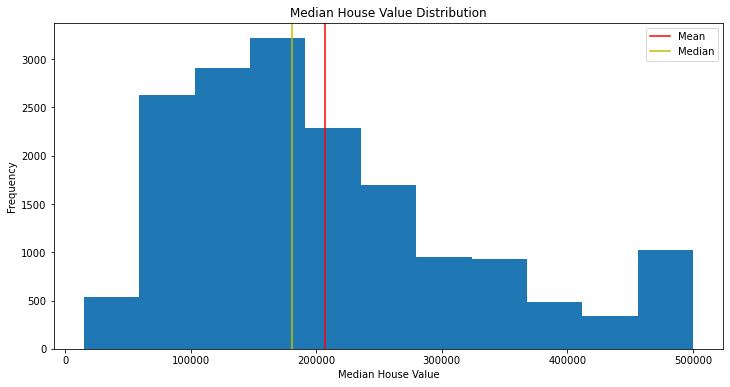

In [21]:
fig = plt.figure(figsize = (12, 6))
plt.hist(df_pd["median_house_value"], bins = 11, range = (14999, 500001))
plt.title("Median House Value Distribution")
plt.ylabel("Frequency")
plt.xlabel("Median House Value")
plt.axvline(x = np.mean(df_pd["median_house_value"]), color = 'r', label = 'Mean')
plt.axvline(x = np.median(df_pd["median_house_value"]), color = 'y', label = 'Median')
plt.legend()

([], [])

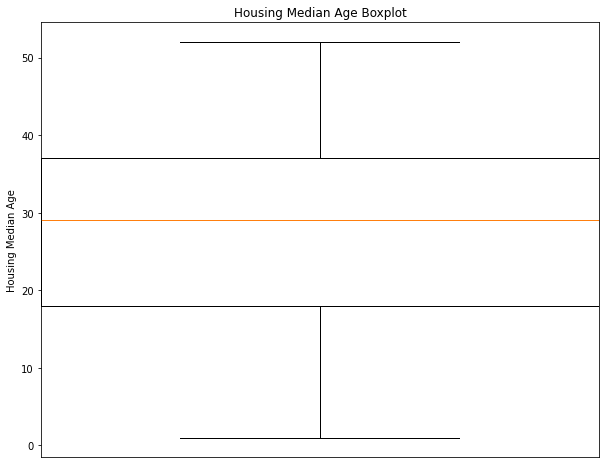

In [21]:
#display a box plot
fig2 = plt.figure(figsize = (10, 8))
plt.boxplot(df_pd["housing_median_age"], widths = 1)
plt.title("Housing Median Age Boxplot")
plt.ylabel("Housing Median Age")
plt.xticks([])

In [22]:
# data frame type
print(type(df))
print(type(df_pd))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [23]:
# Write spark DataFrame data to CSV file
df.write.csv("test_output2.csv")

Py4JJavaError: An error occurred while calling o97.csv.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.jobAbortedError(QueryExecutionErrors.scala:496)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:251)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:186)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:110)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:110)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:106)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:481)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:82)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:481)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:457)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:106)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:93)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:91)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:128)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:848)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:382)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:355)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:239)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:839)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Ljava/lang/String;I)Z
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access(NativeIO.java:793)
	at org.apache.hadoop.fs.FileUtil.canRead(FileUtil.java:1215)
	at org.apache.hadoop.fs.FileUtil.list(FileUtil.java:1420)
	at org.apache.hadoop.fs.RawLocalFileSystem.listStatus(RawLocalFileSystem.java:601)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1972)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:2014)
	at org.apache.hadoop.fs.ChecksumFileSystem.listStatus(ChecksumFileSystem.java:761)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1972)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:2014)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.getAllCommittedTaskPaths(FileOutputCommitter.java:334)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.commitJobInternal(FileOutputCommitter.java:404)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.commitJob(FileOutputCommitter.java:377)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.commitJob(HadoopMapReduceCommitProtocol.scala:182)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$20(FileFormatWriter.scala:240)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.timeTakenMs(Utils.scala:605)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:240)
	... 42 more


In [24]:
# Write spark DataFrame data to json file
df.write.json("test_output.json")

In [26]:
df.coalesce(1).write.csv("test_output2.csv")